# Practical work 8: Split and Merge

In this practical work, we implement and test the split and merge algorithm.

### Binome
- Amine YOUCEF KHODJA
- Amayas SADI

In [1]:
### Usefull libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data
img_test = np.full((64,64),150,dtype=np.uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = np.array(Image.open('img/angiogra.png'))
cam = np.array(Image.open('img/cameraman.png'))
muscle = np.array(Image.open('img/muscle.png'))
prisme = np.array(Image.open('img/prisme.png'))
seiche = np.array(Image.open('img/seiche.png'))

### Usefull functions
def neighbors(b,K):
    """ blockStat*list[blockStat]->list[blockStat]
        returns the list of neighbors of b and elements of K 
    """
    def belongsTo(x,y,a):
        """ int*int*BlockStat -> bool 
            Test if pixel (x,y) belongs to block a 
        """
        return x>=a[0] and y>=a[1] and x<a[0]+a[2] and y<a[1]+a[3]
    def areNeighbors(a,b):
        """ BlockStat**2 -> bool
            Test if a and b are neighbors
        """
        if a[2]>b[2] and a[3]>b[3]:
            a,b=b,a
        x,y = a[0]+a[2]//2,a[1]+a[3]//2
        return belongsTo(x+a[2],y,b) or belongsTo(x-a[2],y,b) or belongsTo(x,y+a[3],b) or belongsTo(x,y-a[3],b)
    N = []
    for n in K:
        if areNeighbors(b,n):
            N.append(n)
    return N


## Exercise 1

### Question 1
Write the recursive function ``split()`` discussed in tutorial work. 
It takes as input the image, a region, a predicate, and a variable number of arguments. 
The region is a Python formal type ``Block`` defined by:
```python
type Block = tuple[int**4]
```
The function ``split()`` returns a quadtree, a Python formal type, recursivelly defined by:
```python
type QuadTree = list[(QuadTree**4|Block)] 
```

The predicate is a Python function with the following signature:
```python
Array*Block*...->bool
```
It can take a variable number of parameters which correspond to the parameters required by the predicate.

In [2]:
# type Block = tuple[int**4]
# type QuadTree = list[(QuadTree**4|Block)] 

def split(I,reg,pred,*args):
    x, y, n, m = reg
    if pred(I, reg, *args) and n > 2 and m > 2: 
        n2 = n//2
        m2 = m//2
        
        no = split(I, (x,y,n2,m2), pred, *args)
        ne = split(I, (x,y+m2, n2, m2), pred, *args)
        so = split(I, (x+n2, y, n2, m2), pred, *args)
        se = split(I, (x+n2, y+m2, n2, m2), pred, *args)
        return [no, ne, so, se]
    return [reg]

### Question 2
Write the function ```predsplit(I,B,*args)``` with signature:
```python
Array*Block*... -> bool
```
that returns True if the standard deviation of image ``I`` computed in region ``B`` is greater than the first value of argument ``*args`` (it can be accessed simply by ``*args[0]``).

In [3]:
def predsplit(I,reg,*args):  
    a,b,c,d = reg
    return I[a:a+c, b:b+d].std() > args[0]

### Question 3
Write the function ``listRegions()`` which applies a depth-first search on the quadtree given as parameter, and returns the list of the leaves of the quadtree. 

Some recalls about lists in Python;
 - Initialization: `L = []` (empty list)
 - Add a element `a` into a list `L`: `L.append(a)`

In [4]:
def listRegions(L):
    
    if len(L) == 1:
        return [L[0]]
    
    Lres = [] 
    for i in range(4): 
        Lres += listRegions(L[i])
    
    return Lres

### Question 4
Test your codes on the synthetic image ``img_test`` seen in tutorial work. Print the value returned by ``split()`` as well as the one returned by ``listRegions()``. 

In [5]:
sp = split(img_test, (0, 0, 64, 64), predsplit,0)
print("Resultat de Split : ", sp)
print("Regions : ", listRegions(sp))

Resultat de Split :  [[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
Regions :  [(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]


### Question 5
Write the function ```drawRegions(L,I)``` which takes as arguments a list of regions, an image, and returns an image  where the boundaries of each region have been traced with red color. Indication: the returned image is a hypermatrix of dimension 3, the third dimension is of size 3 and encodes the red, green and blue components of a RGB colorspace. Test the function on the previous example.

In [6]:
def drawRegions(Lrg,Image):
    
    nl, nc = Image.shape
    bords = np.zeros((nl,nc, 3))
    
    for i in range(nl):
        for j in range(nc):
            bords[i,j] = [Image[i,j], Image[i,j], Image[i,j]]
    
    for reg in Lrg:
        ar, br, cr, dr = reg
        bords[ar:ar+cr, br-1] = [255, 0, 0]
        bords[ar-1, br:br+dr] = [255, 0, 0]
    
    return bords / 255

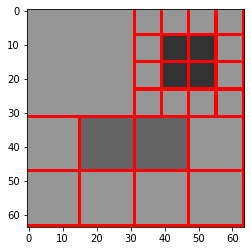

In [7]:
test = drawRegions(listRegions(sp), img_test)
plt.imshow(test)
plt.show()

### Question 6
Add a Gaussian noise with standard deviation 5 to the image ``img_test``. 
Apply the quadtree splitting on the noisy image by adjusting the threshold to obtain the same result as in the previous question. 
Which threshold value should be chosen? Does this make sense to you?

Hint: use the Numpy function ``random.randn()`` which generates random values according to a normal distribution (Gaussian distribution of null mean and variance 1). To obtain realizations of a Gaussian distribution of standard deviation $\sigma$, it is sufficient to multiply by $\sigma$ the realizations of a normal distribution. 

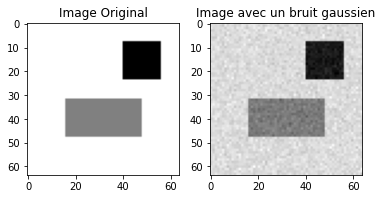

In [8]:
from numpy import random

gauss_mat = np.random.randn(img_test.shape[0],img_test.shape[1]) * 5

gauss_image = img_test + gauss_mat

plt.gray()
plt.subplot(121)
plt.title('Image Original')
plt.imshow(img_test)

plt.subplot(122)
plt.title('Image avec un bruit gaussien')
plt.imshow(gauss_image)
plt.show()

In [9]:
def evolute(thresholds,img_test,predsplit): 
    
    
    nl,nc = img_test.shape
        
    gauss_mat = np.random.randn(nl,nc) * 5

    gauss_image = img_test + gauss_mat

    plt.figure(figsize=(10,12))
    
    
    for th in range(len(thresholds)):
        sp_gauss = split(gauss_image, (0, 0, nl,nc), predsplit,thresholds[th])
        gauss_regs = drawRegions(listRegions(sp_gauss), gauss_image)
        plt.subplot(1,4,th+1)
        plt.title(f'Threshold  : {thresholds[th]}')
        plt.imshow((gauss_regs * 255).astype(np.uint8))

    plt.show()

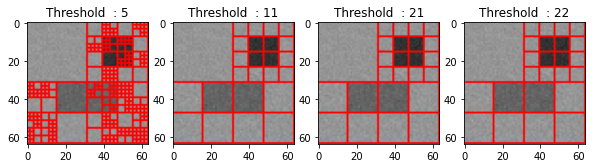

In [10]:
thresholds = [5,11,21,22]
evolute(thresholds,img_test,predsplit)

- Le bon intervalle des valeurs de thresholds est entre 6 et 21
- Oui cela a du sens car le bruitage gaussien qu'on a effectué pour l'image a une valeur de 5. 

## Exercise 2

Experiment the split algorithm on the 4 natural images provided. For each image try to find the threshold that seems to you visually the best. Display the number of regions obtained after splitting.

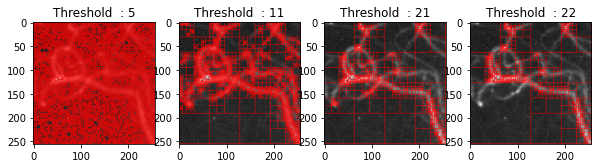

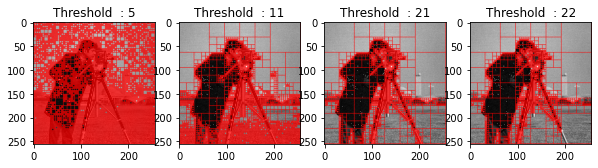

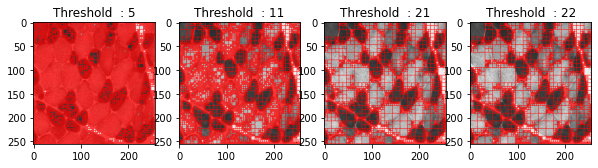

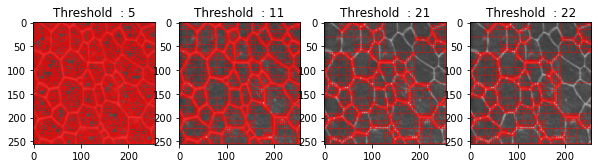

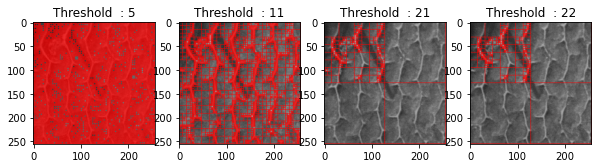

In [11]:
thresholds = [5,11,21,22]

evolute(thresholds,angio,predsplit)
evolute(thresholds,cam,predsplit)
evolute(thresholds,muscle,predsplit)
evolute(thresholds,prisme,predsplit)
evolute(thresholds,seiche,predsplit)

## Exercise 3
### Question 1
Modify the function ``listRegions(L)`` to make it a function ``listRegionsStat(L,I)`` which computes the list of leaves of the quadtree ``L``. Each element of this list will be enriched with three scalar values: the first being the size, the second the mean and the third the variance of pixel values of the block in the image ``I``. This function then returns a list whose elements have the following formal type:
```python
type BlockStat = tuple[int**4,int,float**2]
```

The first four values are those of the ``Block`` type, the fifth is the size of the block (in number of pixels) and the last two values are the mean and variance calculated over the region.

In [12]:
# type BlockStat = tuple[int**4,int,float**2]

def listRegionsStat(L,Image):
        
    if len(L) == 1:
        x, y, n, m = L[0] 
        return[(x, y, n, m, n*m, Image[x:x+n, y:y+m].mean(),Image[x:x+n, y:y+m].var())] 
    
    Lres = []
    for i in range(4):
        Lres += listRegionsStat(L[i], Image)
    return Lres


In [13]:
result = listRegionsStat(sp, img_test)
print(result)

[(0, 0, 32, 32, 1024, 150.0, 0.0), (0, 32, 8, 8, 64, 150.0, 0.0), (0, 40, 8, 8, 64, 150.0, 0.0), (8, 32, 8, 8, 64, 150.0, 0.0), (8, 40, 8, 8, 64, 50.0, 0.0), (0, 48, 8, 8, 64, 150.0, 0.0), (0, 56, 8, 8, 64, 150.0, 0.0), (8, 48, 8, 8, 64, 50.0, 0.0), (8, 56, 8, 8, 64, 150.0, 0.0), (16, 32, 8, 8, 64, 150.0, 0.0), (16, 40, 8, 8, 64, 50.0, 0.0), (24, 32, 8, 8, 64, 150.0, 0.0), (24, 40, 8, 8, 64, 150.0, 0.0), (16, 48, 8, 8, 64, 50.0, 0.0), (16, 56, 8, 8, 64, 150.0, 0.0), (24, 48, 8, 8, 64, 150.0, 0.0), (24, 56, 8, 8, 64, 150.0, 0.0), (32, 0, 16, 16, 256, 150.0, 0.0), (32, 16, 16, 16, 256, 100.0, 0.0), (48, 0, 16, 16, 256, 150.0, 0.0), (48, 16, 16, 16, 256, 150.0, 0.0), (32, 32, 16, 16, 256, 100.0, 0.0), (32, 48, 16, 16, 256, 150.0, 0.0), (48, 32, 16, 16, 256, 150.0, 0.0), (48, 48, 16, 16, 256, 150.0, 0.0)]


- les moyennes sont toujours égales à une valeur qui est représentée dans l'image d'origine " img_test découpé en blocs homogènes "
- Les variances sont toutes nulles.

### Question 2
In the remainder, the formal type is considered:
```python
type Region = list[BlocStats]
```
A region, as seen during the tutorial work, is therefore a list of blocks. Write the predicate ``predmerge(b,R,*args)`` as seen in tutorial work. This function returns ``True`` if the ``b`` block should merge into the ``R`` region. If a merge happens, then the first item of ``R`` will have its statistics updated to describe the statistics of the region ``R`` merged with `b`.

In [14]:
def predmerge(block,R,*args):
    
    a, b, c, d, n1, mu1, v1 = block
    x, y, z, t, n2, mu2, v2 = R[0] 
    
    new_n = n1 + n2
    new_mu = (n1*mu1 + n2*mu2) / new_n
    new_v = (n1*(v1**2 + mu1**2) + n2*(v2**2 + mu2**2)) / new_n - new_mu**2
    
    if new_v < args[0]**2: 
        
        R[0] = x, y, z, t, new_n, new_mu, new_v
        return True
    
    return False

### Question 3
Using `predmerge()` and `neighbors()` functions, given at the beginning of the notebook, write the function ``merge()`` discussed in tutorial work (exercise 7.6).

Recalls on Python lists:
- Remove an element `a` from a list `L`: `L.remove(a)`
- Test if `a` belongs to a list `L`: `a in L` 
- Iterate the elements of a list `L`: `for a in L:`
- Access to an element of a list: as with numpy arrays

In [15]:
def merge(S,Image,pred,*args):
    
    K = listRegionsStat(S,Image)
    res = []
    
    while K != []:
        b = K[0]
        K.remove(b)
        R = [b] 
        N = neighbors(b, K)
                
        for nb in N: 
            if nb in K and pred(nb, R, args[0]):
                K.remove(nb)
                R.append(nb)
                
                N += neighbors(nb, K)                
        res.append(R)
        
    return res

### Question 4
Test the previous functions using the synthetic image `img_test`. In particular, check that merge() returns a list of 3 elements (i.e. 3 regions).

In [16]:
nl,nc = img_test.shape
QT = split(img_test, (0, 0, nl,nc), predsplit, 0)
M = merge(QT, img_test, predmerge, 1)
assert len(M) == 3

### Question 5
Write a function ``regions(LR,shape)`` that takes as arguments a list of regions (such as returned by the function ``merge()``) and an image size, and returns an image of the regions. Each region will be colored with the gray level corresponding to the average of the region. The ``shape`` parameter gives the size of the image to be produced. 

Test the function on the previous example.

In [17]:
def regions(LR,shape):
    
    I = np.zeros(shape)
    
    for l in LR : 
        for reg in l:
            a, b, c, d, _, mu, _ = reg
            I[a:a+c, b:b+d] = mu
    return I

## Exercise 4: experiments
### Question 1
Test the function ``merge()`` on the images ``angio``, ``cam``, ``muscle``, ``prisme`` and ``seiche``. Try to produce the best segmentations.

In [18]:
import time
def evolute_merge(image,predsplit,merge_fc,alpha):    
    plt.figure(figsize=(12,13))
    i,j = image.shape
    tic = time.time()
    sp_image = split(image, (0, 0, i, j), predsplit,np.std(image)*alpha)
    mer_image = merge_fc(sp_image, image, predmerge, np.std(image)*alpha)
    image_merged = regions(mer_image , (i,j))
    rgs = drawRegions(listRegions(sp_image), image)
    tac = time.time()
    plt.title('Valeur du Threshold = %.2f * var_img '%alpha)
    plt.subplot(121)
    plt.imshow(image_merged)
    plt.subplot(122)
    plt.imshow(rgs)
    print("variance de l'image ", np.std(image))
    print('Nombre de regions:', len(listRegions(sp_image)))
    print('Nouvelle variance', np.std(image_merged))
    print( f"Temps d'execution : {tac-tic}")
    plt.show()

variance de l'image  62.34123968732711
Nombre de regions: 2446
Nouvelle variance 59.99340545081577
Temps d'execution : 3.5942890644073486


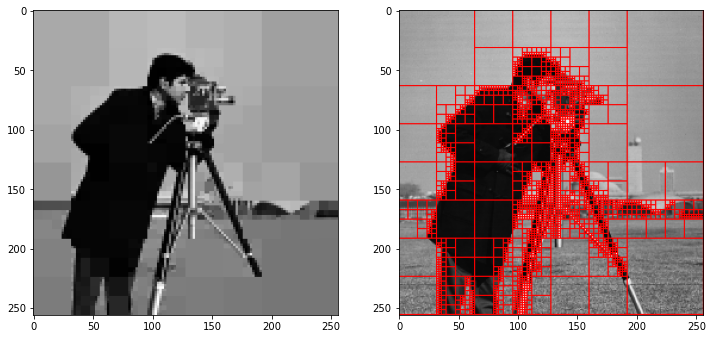

variance de l'image  33.76748539743484
Nombre de regions: 6145
Nouvelle variance 32.923840381672065
Temps d'execution : 20.284024000167847


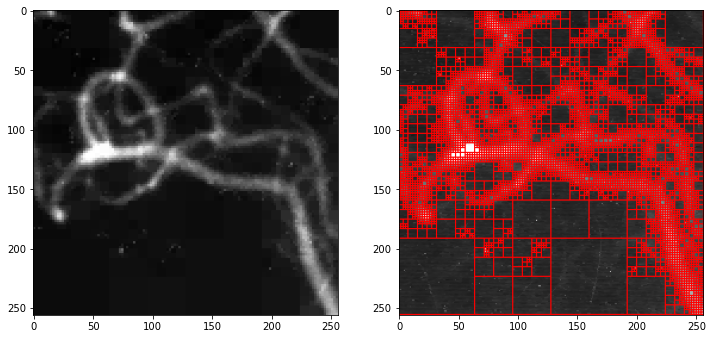

variance de l'image  56.66370058179967
Nombre de regions: 5137
Nouvelle variance 54.952869663310466
Temps d'execution : 13.836961507797241


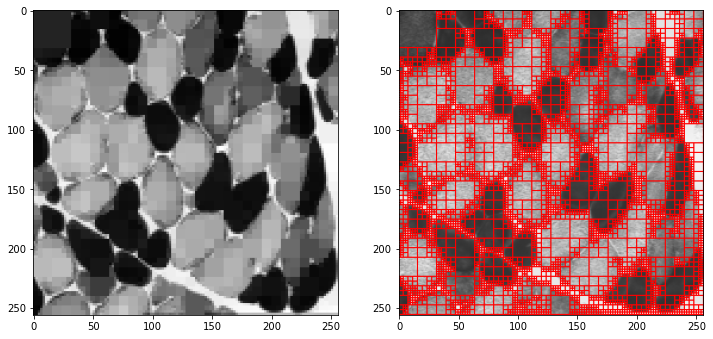

variance de l'image  21.512032237446647
Nombre de regions: 15415
Nouvelle variance 20.924862022404394
Temps d'execution : 119.90654611587524


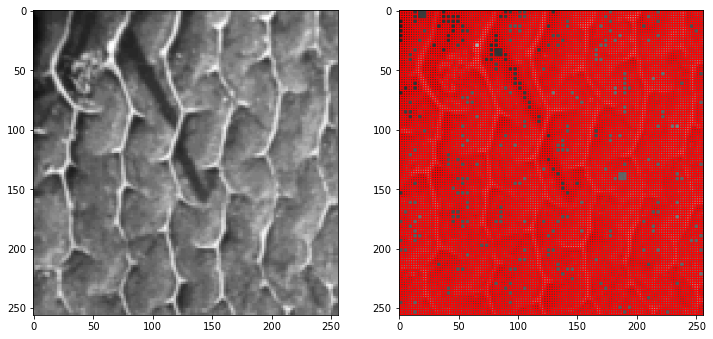

variance de l'image  25.686917499807638
Nombre de regions: 4627
Nouvelle variance 23.881926200287506
Temps d'execution : 13.428858757019043


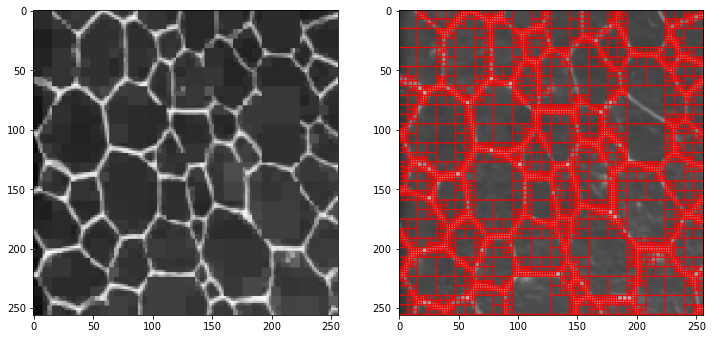

In [19]:
evolute_merge(cam,predsplit,merge,0.4)
evolute_merge(angio,predsplit,merge,0.2)
evolute_merge(muscle,predsplit,merge,0.3)
evolute_merge(seiche,predsplit,merge,0.1)
evolute_merge(prisme,predsplit,merge,0.6)

### Question 2
The result of the merge algorithm highly depends on how you visit the regions. One can then sort the leaves of the quadtree, for example, from the smallest to the largest blocks, or the opposite (use the Python function ``sorted()``). 
The same question arises when calculating the set of neighbors of the merged region. Should they be sorted? If yes, according to which criteria? their size? their proximity? 
Obviously there is no universal answer but it should be adapted to each type of problem. 
Do some tests to see the influence of these sortings on the result of the merger.

In [20]:
def merge_sorted_regions(S,I,pred,*args):

    K = listRegionsStat(S,I)
    K = sorted(K, key=lambda k:k[4], reverse=True) 
    Lres = []
    
    while K != []:
        b = K[0]
        K.remove(b)
        R = [b] 
        N = neighbors(b, K)
                
        for nb in N: 
            if nb in K and pred(nb, R, args[0]):
                K.remove(nb)
                R.append(nb)
                
                N += neighbors(nb, K)
                
        Lres.append(R)
    return Lres

variance de l'image  62.34123968732711
Nombre de regions: 2446
Nouvelle variance 60.02781410689224
Temps d'execution : 3.4731829166412354


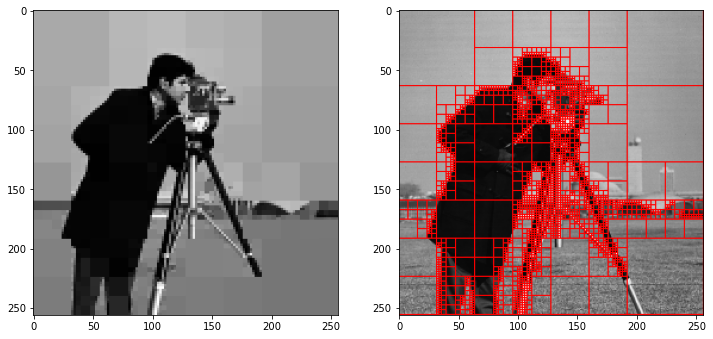

variance de l'image  33.76748539743484
Nombre de regions: 6145
Nouvelle variance 32.922127957281766
Temps d'execution : 19.42703604698181


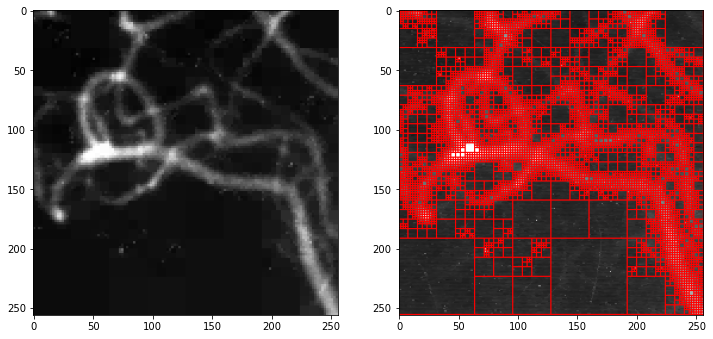

variance de l'image  56.66370058179967
Nombre de regions: 5137
Nouvelle variance 54.920829103947774
Temps d'execution : 14.991360187530518


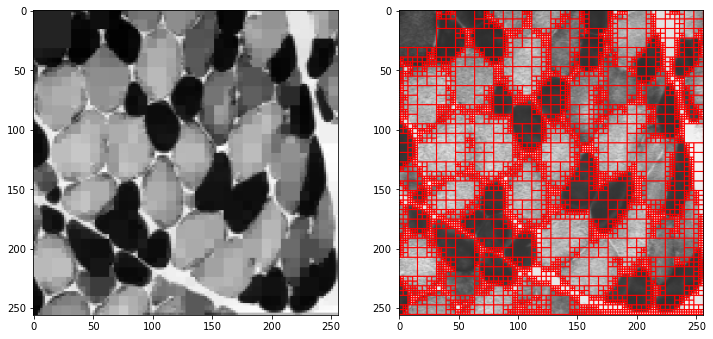

variance de l'image  21.512032237446647
Nombre de regions: 15415
Nouvelle variance 20.92451198446922
Temps d'execution : 126.79718327522278


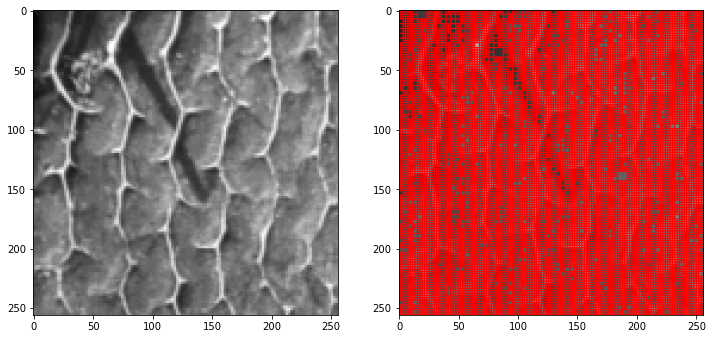

variance de l'image  25.686917499807638
Nombre de regions: 4627
Nouvelle variance 23.877609309604676
Temps d'execution : 13.762352466583252


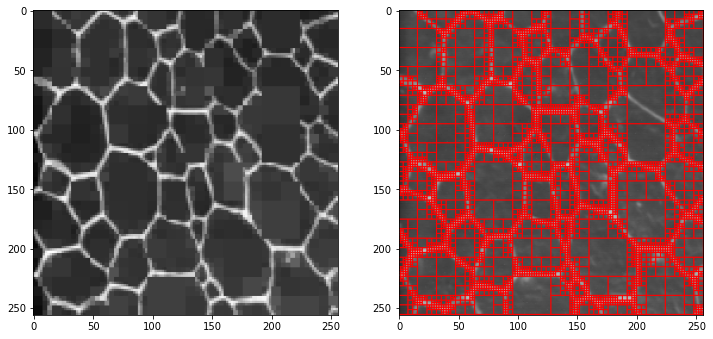

In [21]:
evolute_merge(cam,predsplit,merge_sorted_regions,0.4)
evolute_merge(angio,predsplit,merge_sorted_regions,0.2)
evolute_merge(muscle,predsplit,merge_sorted_regions,0.3)
evolute_merge(seiche,predsplit,merge_sorted_regions,0.1)
evolute_merge(prisme,predsplit,merge_sorted_regions,0.6)

In [22]:
def merge_sorted_neighbors(S,I,pred,*args):
    
    K = listRegionsStat(S,I) 
    Lres = []
    
    while K != []:
        b = K[0]
        K.remove(b)
        R = [b]
        N = neighbors(b, K)
        N = sorted(N, key=lambda n:n[4], reverse = True)
        
        
        for nb in N:
            if nb in K and pred(nb, R, args[0]):
                K.remove(nb)
                R.append(nb)
                
                N += neighbors(nb, K)
                N = sorted(N, key=lambda n:n[4], reverse = True)
                
        Lres.append(R)
    return Lres

variance de l'image  62.34123968732711
Nombre de regions: 2446
Nouvelle variance 59.96450311367785
Temps d'execution : 3.767850399017334


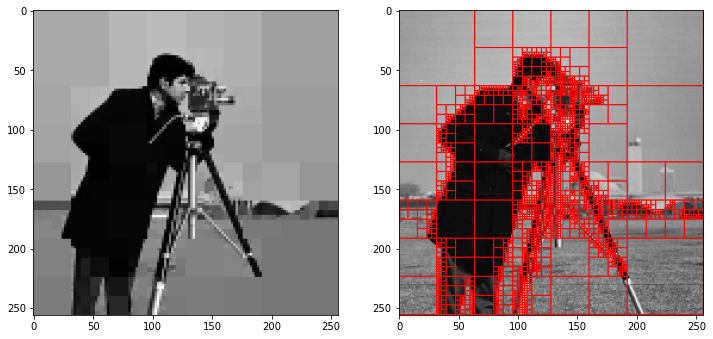

variance de l'image  33.76748539743484
Nombre de regions: 6145
Nouvelle variance 32.92431114228067
Temps d'execution : 20.747422695159912


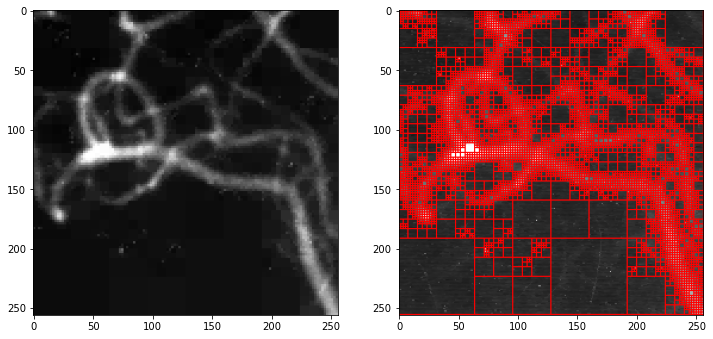

variance de l'image  56.66370058179967
Nombre de regions: 5137
Nouvelle variance 54.95738004011528
Temps d'execution : 14.94211483001709


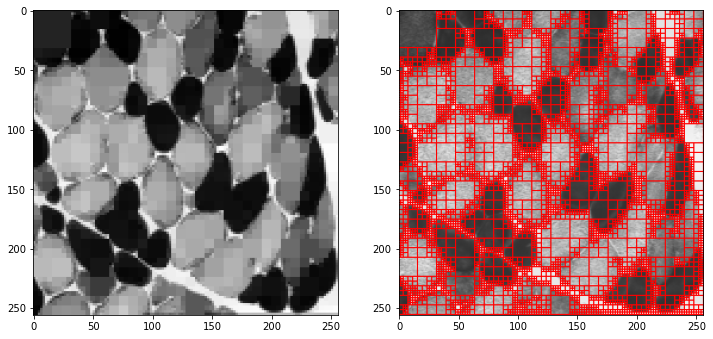

variance de l'image  21.512032237446647
Nombre de regions: 15415
Nouvelle variance 20.925369868428312
Temps d'execution : 123.22148895263672


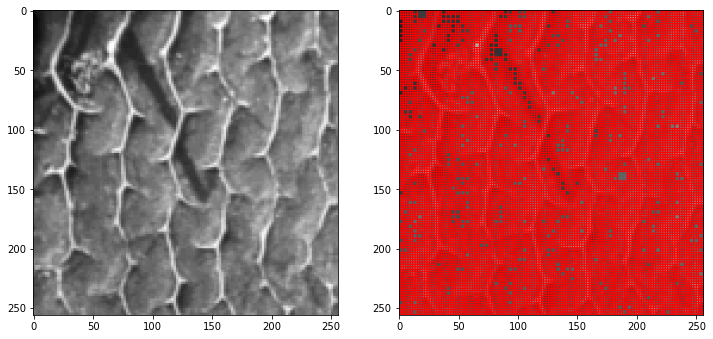

variance de l'image  25.686917499807638
Nombre de regions: 4627
Nouvelle variance 23.890883607497646
Temps d'execution : 12.043280363082886


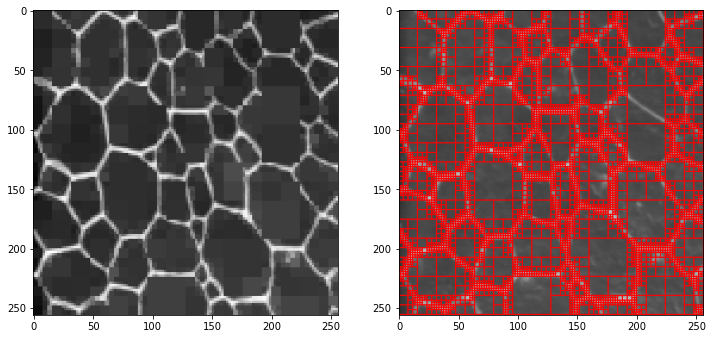

In [23]:
evolute_merge(cam,predsplit,merge_sorted_neighbors,0.4)
evolute_merge(angio,predsplit,merge_sorted_neighbors,0.2)
evolute_merge(muscle,predsplit,merge_sorted_neighbors,0.3)
evolute_merge(seiche,predsplit,merge_sorted_neighbors,0.1)
evolute_merge(prisme,predsplit,merge_sorted_neighbors,0.6)

On voit une nette amelioration sur le temps d'execution apres le tri sur les regions ou les voisins

### Question 3 (bonus)
Imagine and experiment alternative predicates for both the split and the merge steps. It is possible to use edges-based predicates, and also to combine with variance-based predicates.
